In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y
3,LP001006,Male,Yes,2583,120.0,Y
4,LP001008,Male,No,6000,141.0,Y


In [3]:
df.shape

(598, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


In [5]:
df.describe()

,ApplicantIncome,LoanAmount
count,598.000000,577.000000
mean,5292.252508,144.968804
std,5807.265364,82.704182
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3806.000000,127.000000
75%,5746.000000,167.000000
max,81000.000000,650.000000


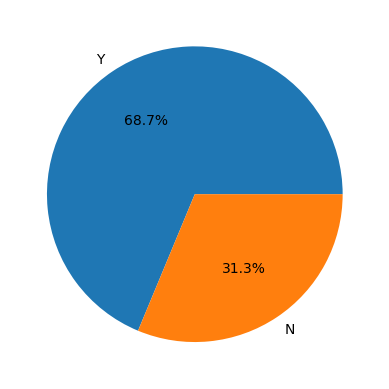

In [6]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
plt.show()

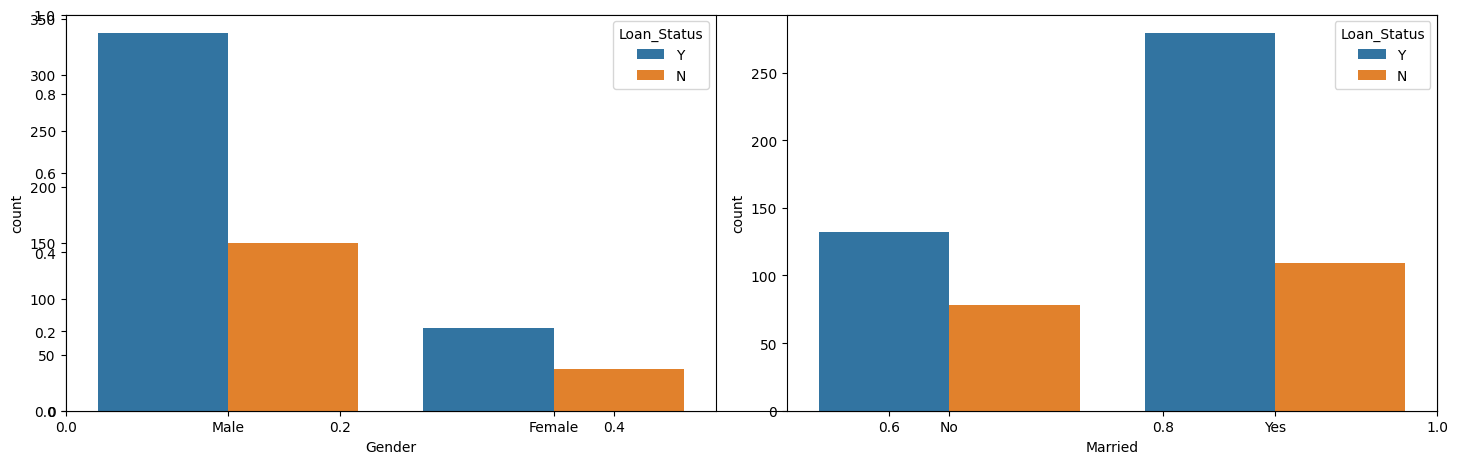

In [7]:
fig,axes = plt.subplots(figsize=(15,5))
for i, col in enumerate(['Gender','Married']):
  plt.subplot(1,2,i+1)
  sb.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()


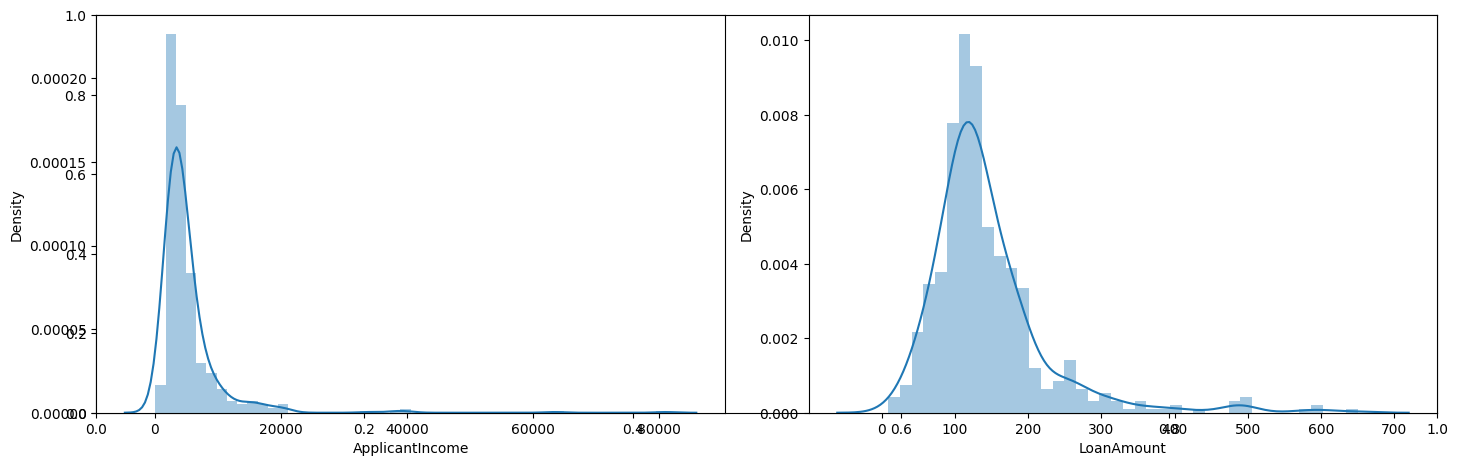

In [8]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(['ApplicantIncome','LoanAmount']):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

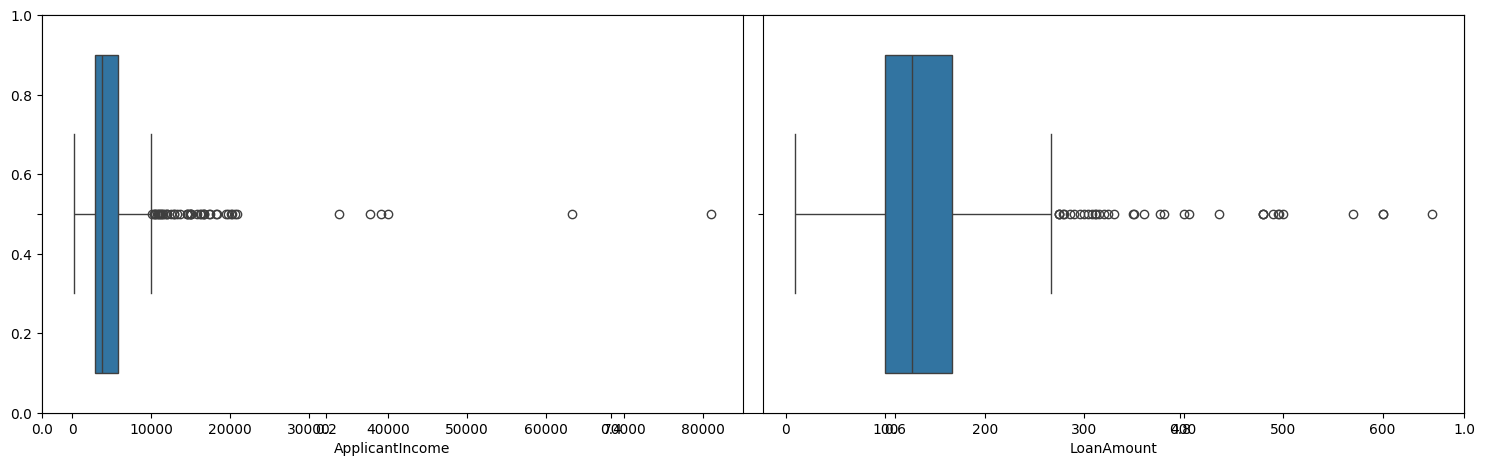

In [9]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col], orient ="h")
plt.tight_layout()
plt.show()

In [10]:
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']

,LoanAmount
Gender,
Female,126.697248
Male,149.224359


In [11]:
df.groupby(['Married', 'Gender']).mean(numeric_only = True)['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      136.088000
Yes      Female    153.322581
         Male      154.011662
Name: LoanAmount, dtype: float64

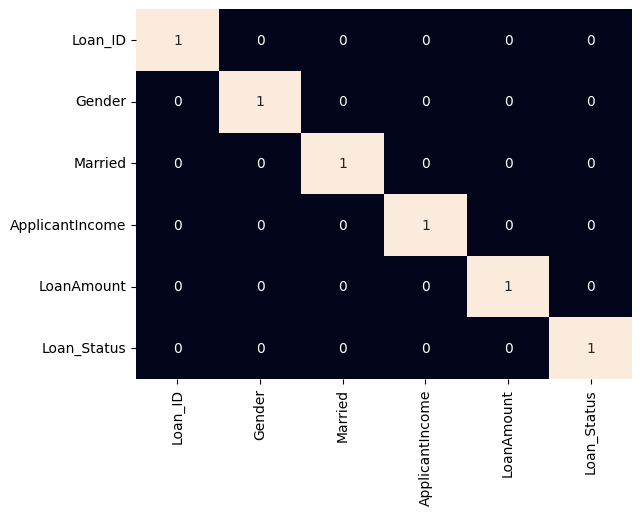

In [12]:
def encode_labels(data):
  for col in data.columns:
    if data[col].dtype == 'object':
      le = LabelEncoder()
      data[col] = le.fit_transform(data[col])


  return data

df = encode_labels(df)
sb.heatmap(df.corr() > 0.8, annot = True ,cbar = False)
plt.show()

In [13]:
features = df.drop('Loan_Status', axis = 1)
target = df['Loan_Status'].values

x_train, x_val, y_train, y_val = train_test_split(features, target, test_size = 0.2, random_state = 10)

ros = RandomOverSampler(sampling_strategy = 'minority',random_state = 0)
x,y = ros.fit_resample(x_train, y_train)
x_train.shape, x.shape

((478, 5), (668, 5))

In [14]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_val = scaler.transform(x_val)

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')
x = imputer.fit_transform(x)
x_val = imputer.transform(x_val)

In [16]:
model = SVC(kernel='rbf')
model.fit(x,y)

SVC()

In [17]:
print('Training Accuracy : ', roc_auc_score(y, model.predict(x)))
print('Validation Accuracy ;', roc_auc_score(y_val, model.predict(x_val)))

Training Accuracy :  0.62125748502994
Validation Accuracy ; 0.514195107218363


In [18]:
from sklearn.metrics import confusion_matrix
training_roc_auc = roc_auc_score(y, model.predict(x))
validation_roc_auc = roc_auc_score(y_val, model.predict(x_val))
print('Training ROC AUC Score:',training_roc_auc)
print('Training ROC AUC Score:', validation_roc_auc)
print()
cm = confusion_matrix(y_val, model.predict(x_val))

Training ROC AUC Score: 0.62125748502994
Training ROC AUC Score: 0.514195107218363



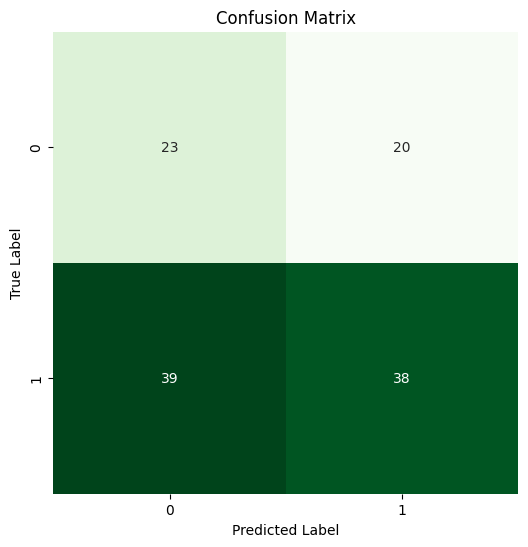

In [19]:
plt.figure(figsize=(6,6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, model.predict(x_val)))

              precision    recall  f1-score   support

           0       0.37      0.53      0.44        43
           1       0.66      0.49      0.56        77

    accuracy                           0.51       120
   macro avg       0.51      0.51      0.50       120
weighted avg       0.55      0.51      0.52       120

